In [1]:
import pandas as pd
import urllib.request

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 1000)
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/Hackathon

/content/drive/My Drive/Colab Notebooks/Hackathon


In [6]:
%pwd

'/content/drive/My Drive/Colab Notebooks/Hackathon'

In [7]:
file ='file_france.csv'
df_cat = pd.read_csv(file, sep='\t')
df_cat.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,8,13,47,52,55,64,79,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(796286, 184)

In [8]:
cols_retain = ['code','url','product_name','brands','carbon-footprint_100g', 'categories_tags', 'categories_en', 'countries_en','image_url', 'image_small_url']
df_cat_final = df_cat[cols_retain]

In [9]:
df_cat_final= df_cat_final[df_cat_final["carbon-footprint_100g"].notnull()]
df_cat_final= df_cat_final[df_cat_final["categories_tags"].notnull()]
df_cat_final= df_cat_final[df_cat_final["image_url"].notnull()]
df_cat_final.shape

(308, 10)

In [10]:
df_cat_final['leaf_category_list'] = df_cat_final['categories_tags'].str.split(',')
leaf_list = [] 

for id, row in df_cat_final.iterrows() :
  if row['leaf_category_list'][-1][0:2] =='en':
    leaf_cat = row['leaf_category_list'][-1]
  else:
    if(len(row['leaf_category_list']))>1:
      leaf_cat = row['leaf_category_list'][-2]
    else:
      leaf_cat = row['leaf_category_list'][0]
  leaf_list.append(leaf_cat)

df_cat_final['leaf_category'] = leaf_list

In [11]:
df_cat_final.head(3)

,code,url,product_name,brands,carbon-footprint_100g,categories_tags,categories_en,countries_en,image_url,image_small_url,leaf_category_list,leaf_category
33819,0208015019813,http://world-en.openfoodfacts.org/product/0208015019813/boudins-noirs-nature-porcidou,Boudins noirs nature,Porcidou,100.0,"en:meats,en:prepared-meats","Meats,Prepared meats",France,https://static.openfoodfacts.org/images/products/020/801/501/9813/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/020/801/501/9813/front_fr.4.200.jpg,"[en:meats, en:prepared-meats]",en:prepared-meats
33822,0208016022041,http://world-en.openfoodfacts.org/product/0208016022041/5-boudins-noirs-piment-porcidou,5 boudins noirs piment,Porcidou,100.0,"en:meats,en:prepared-meats","Meats,Prepared meats",France,https://static.openfoodfacts.org/images/products/020/801/602/2041/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/020/801/602/2041/front_fr.4.200.jpg,"[en:meats, en:prepared-meats]",en:prepared-meats
33830,0208019018690,http://world-en.openfoodfacts.org/product/0208019018690/mini-boudins-noirs-nature-porcidou,Mini boudins noirs nature,Porcidou,100.0,"en:meats,en:prepared-meats,en:fish-and-meat-and-eggs,en:offals,fr:boudins,en:tripe-dishes,en:black-pudding,en:sauteed-black-pudding","Meats,Prepared meats,Fish and meat and eggs,Offals,fr:Boudins,Tripe dishes,Black pudding,Sautéed black pudding",France,https://static.openfoodfacts.org/images/products/020/801/901/8690/front_fr.16.400.jpg,https://static.openfoodfacts.org/images/products/020/801/901/8690/front_fr.16.200.jpg,"[en:meats, en:prepared-meats, en:fish-and-meat-and-eggs, en:offals, fr:boudins, en:tripe-dishes, en:black-pudding, en:sauteed-black-pudding]",en:sauteed-black-pudding


In [12]:
categories = ['en:unsweetened-beverages','en:dark-chocolates','en:sweetened-beverages','en:milk-chocolates']

In [13]:
df_cat_final_sel = df_cat_final[df_cat_final.leaf_category.isin(categories)]

In [20]:
df_cat_final_sel.count()

code                     40
url                      40
product_name             40
brands                   40
carbon-footprint_100g    40
categories_tags          40
categories_en            40
countries_en             40
image_url                40
image_small_url          40
leaf_category_list       40
leaf_category            40
dtype: int64

In [19]:
df_cat_final_sel.to_csv('model_input.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2966b6710>,
      dtype=object)

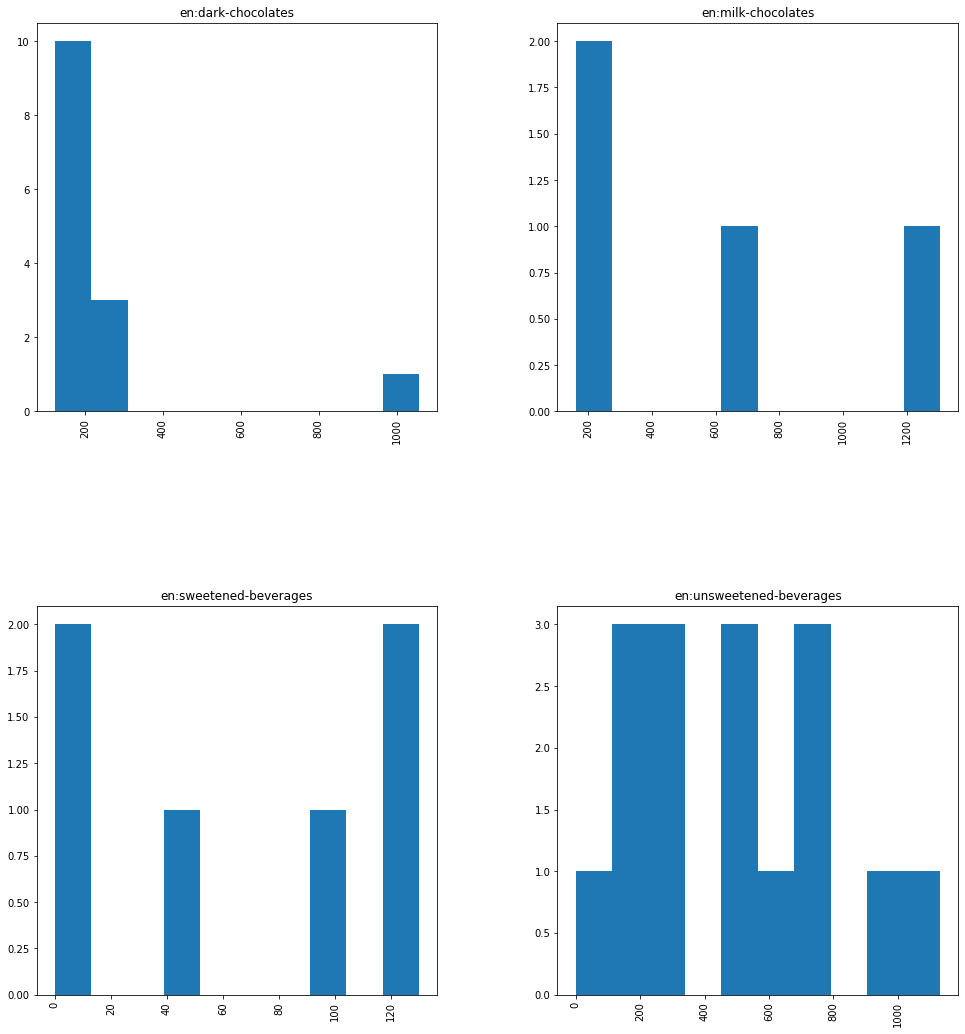

In [14]:
df_cat_final_sel['carbon-footprint_100g'].hist(by=df_cat_final_sel['leaf_category'], figsize = (16,18))

In [15]:
df_cat_final_sel['carbon-footprint_100g'].describe()

count      40.00000
mean      357.10000
std       333.36765
min         0.00000
25%       149.75000
50%       218.50000
75%       545.50000
max      1305.00000
Name: carbon-footprint_100g, dtype: float64

In [16]:
image_list = list(df_cat_final_sel['image_url'])
code_list = list(df_cat_final_sel['code'])

In [18]:
for i in range(len(image_list)):
  imgURL = image_list[i]
  product_id = str(code_list[i])
  file_name = "/content/drive/My Drive/Colab Notebooks/Hackathon/Images/"+ product_id+".jpg"
  urllib.request.urlretrieve(imgURL, file_name)